##Run basic occlussion/deletion experiments on the facenet model

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import numpy as np
import tensorflow as tf

In [ ]:
def apply_grey_patch(image, top_left_x, top_left_y, patch_size, value):
    patched_image = np.array(image, copy=True)
    original = patched_image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, 0]
    
    patched_image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :] = 127.5 
    return patched_image

In [ ]:
def paste_mask(image, top_left_x, top_left_y, patch_size, value):
    patched_image = np.array(image, copy=True)
    # original = patched_image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, 0]
    
    patched_image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size] += int(value * 256 * 3)
    return np.clip(patched_image, 0, 255)

In [ ]:
image_pil = Image.open("/content/mingcroppedcopy.png")
img = np.asarray(image_pil)  

print(img)

In [ ]:
PATCH_SIZE = 10

In [ ]:
image_array = []
image_array.append(img)
# Iterate the patch over the image
for top_left_x in range(0, img.shape[0], PATCH_SIZE):
    for top_left_y in range(0, img.shape[1], PATCH_SIZE):
        patched_image = apply_grey_patch(img, top_left_x, top_left_y, PATCH_SIZE, 126)
        image_array.append(patched_image)

In [ ]:
from PIL import Image    
from tensorflow.python.platform import gfile




# print(image_array)

with tf.Graph().as_default():      
        with tf.Session() as sess:

            with gfile.FastGFile("/content/drive/MyDrive/facenet_converted.pb",'rb') as f:
              graph_def = tf.GraphDef()
              graph_def.ParseFromString(f.read())
              tf.import_graph_def(graph_def, input_map=None, name='')

            # Get input and output tensors
            images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
            embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
            embedding_size = embeddings.get_shape()[1]

            feed_dict = { images_placeholder:image_array }

            emb_array = sess.run(embeddings, feed_dict=feed_dict)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(emb_array.shape)

(257, 512)


In [ ]:
distances = []
for i in range(1, emb_array.shape[0]):
  dist = np.sum(np.square(np.subtract(emb_array[0], emb_array[i])), 0)
  distances.append(dist)

In [ ]:
print(len(distances))

256


In [ ]:
print( max(distances))

0.032090634


In [ ]:
distances_max = np.sqrt(distances / max(distances))

In [ ]:
with np.printoptions(precision=2):
  print(np.reshape(distances_max, (16,16)))

In [ ]:
i=0
# img = np.asarray(image_pil)
maskarray = np.zeros((160,160), dtype=np.uint8)
for top_left_x in range(0, maskarray.shape[0], PATCH_SIZE):
    for top_left_y in range(0, maskarray.shape[1], PATCH_SIZE):

        maskarray = paste_mask(maskarray, top_left_x, top_left_y, PATCH_SIZE, distances_max[i])
        i+=1

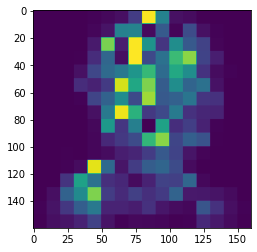

In [ ]:
from matplotlib.pyplot import imshow
imshow(maskarray)


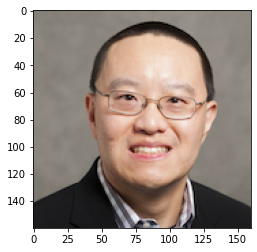

In [ ]:
img = np.asarray(image_pil)
imshow(img.astype(int))

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(maskarray.shape)

(160, 160)


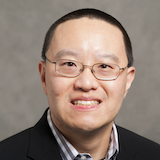

In [ ]:
from PIL import Image               # to load images
from IPython.display import display # to display images

ming = Image.open('/content/mingcroppedcopy.png')
display(ming)

In [ ]:
red = Image.new('RGB', (160, 160), color='red')

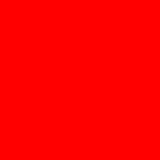

In [ ]:
display(red)

In [ ]:
print(img.shape)

mask = Image.fromarray(maskarray, mode='L')

(160, 160, 3)


In [ ]:
print(mask.size)

(160, 160)


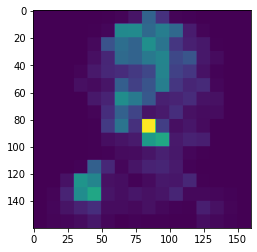

In [ ]:
imshow(img)

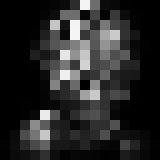

In [ ]:
display(mask)

In [ ]:
a = np.asarray(mask)

In [ ]:
print(a)

In [ ]:
print(maskarray)

In [ ]:
final = Image.composite(red, ming, mask)

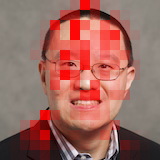

In [ ]:
display(final)